In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import hvplot.pandas
import numpy as np
import datetime
from scipy.stats import linregress

In [3]:
# Import cattle counts excerpt created in abs_cattle_totals_2020_transform.ipynb
qld_data = pd.read_csv("data/abs_qld_cattle_counts_excerpt.csv")
qld_data.head()

,Unnamed: 0,Year,Queensland
0,16,1978,10261.0
1,17,1979,9756.0
2,18,1980,9359.0
3,19,1981,9210.0
4,20,1982,8980.7


In [4]:
# Check column names
qld_data.columns.to_list()

['Unnamed: 0', 'Year', 'Queensland']

In [5]:
# Only keep the year and herd size values
qld_cattle_final = qld_data[["Year", "Queensland"]]
qld_cattle_final.head()

,Year,Queensland
0,1978,10261.0
1,1979,9756.0
2,1980,9359.0
3,1981,9210.0
4,1982,8980.7


In [6]:
# Check data types
qld_cattle_final.dtypes

Year            int64
Queensland    float64
dtype: object

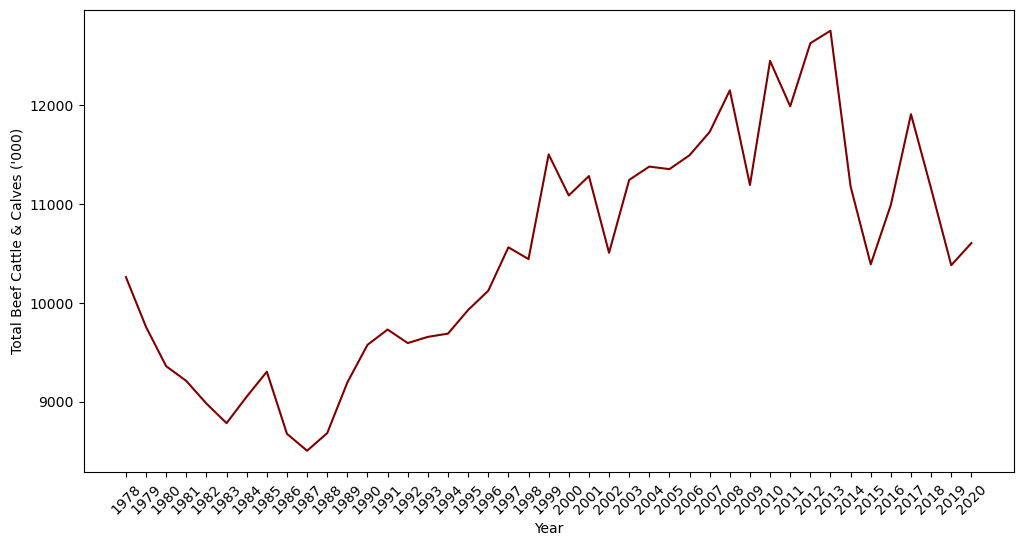

In [7]:
# Plot cattle numbers by year
x_values = qld_cattle_final["Year"]
y_values = qld_cattle_final["Queensland"]
fig = plt.figure(figsize=(12,6))
plt.plot(x_values, y_values, color="maroon")
plt.xticks(np.arange(min(x_values), max(x_values)+1, 1.0), rotation=45)
plt.xlabel("Year")
plt.ylabel("Total Beef Cattle & Calves ('000)")
plt.savefig("QLD_cattle_base.png")
plt.show()

In [8]:
# Import river dishcarge data created in anna_flooddata_ingest.ipynb
all_flood_data = pd.read_csv("data/anna_flooddata.csv")
all_flood_data.head()

,date,location,latitude,longitude,temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum,precipitation_hours,windspeed_10m_max,river_discharge
0,1990-01-01,Brisbane,-27.5,153.0,28.6,18.3,22.5,0.0,0.0,14.1,33.20
1,1990-01-02,Brisbane,-27.5,153.0,29.3,17.0,22.9,0.0,0.0,13.4,31.58
2,1990-01-03,Brisbane,-27.5,153.0,30.8,19.3,24.1,0.0,0.0,13.1,30.41
3,1990-01-04,Brisbane,-27.5,153.0,35.5,18.5,26.0,0.0,0.0,16.8,29.48
4,1990-01-05,Brisbane,-27.5,153.0,27.4,22.0,24.3,0.0,0.0,19.4,28.85


In [9]:
# Convert "date" column to datetime
all_flood_data["date"] = all_flood_data["date"].astype("datetime64[ns]")

In [10]:
# Extract year from "date" column
all_flood_data['Year'] = all_flood_data["date"].dt.strftime("%Y")
all_flood_data.head()

,date,location,latitude,longitude,temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum,precipitation_hours,windspeed_10m_max,river_discharge,Year
0,1990-01-01,Brisbane,-27.5,153.0,28.6,18.3,22.5,0.0,0.0,14.1,33.20,1990
1,1990-01-02,Brisbane,-27.5,153.0,29.3,17.0,22.9,0.0,0.0,13.4,31.58,1990
2,1990-01-03,Brisbane,-27.5,153.0,30.8,19.3,24.1,0.0,0.0,13.1,30.41,1990
3,1990-01-04,Brisbane,-27.5,153.0,35.5,18.5,26.0,0.0,0.0,16.8,29.48,1990
4,1990-01-05,Brisbane,-27.5,153.0,27.4,22.0,24.3,0.0,0.0,19.4,28.85,1990


In [11]:
# Calculate average river discharge by year
all_flood_data_yearly = all_flood_data.groupby("Year").mean(numeric_only=True)
all_flood_data_yearly

,latitude,longitude,temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum,precipitation_hours,windspeed_10m_max,river_discharge
Year,,,,,,,,,
1990,-22.5283,149.581175,26.461233,18.555411,22.119932,3.340959,3.267808,17.824658,202.321500
1991,-22.5283,149.581175,26.890685,18.683699,22.419452,2.246575,2.855479,17.027740,468.477342
1992,-22.5283,149.581175,26.810656,18.896516,22.471038,1.644604,2.459016,16.909836,26.387671
1993,-22.5283,149.581175,26.690342,19.052055,22.483014,1.141301,2.364384,17.638699,9.648863
1994,-22.5283,149.581175,26.849178,18.464247,22.238493,1.168493,2.110959,18.095548,15.456911
1995,-22.5283,149.581175,26.960685,19.091918,22.610753,1.715068,2.675342,17.691164,28.288390
1996,-22.5283,149.581175,26.812910,18.758538,22.408402,2.202049,3.820355,17.679986,47.271796
1997,-22.5283,149.581175,26.434452,18.860685,22.290411,2.050753,2.915068,17.507945,140.364521
1998,-22.5283,149.581175,26.827397,19.740959,22.943151,2.622192,3.947945,17.156849,167.845918


In [12]:
# Reset the index
all_flood_data_yearly.reset_index(inplace=True)
all_flood_data_yearly.head()

,Year,latitude,longitude,temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum,precipitation_hours,windspeed_10m_max,river_discharge
0,1990,-22.5283,149.581175,26.461233,18.555411,22.119932,3.340959,3.267808,17.824658,202.321500
1,1991,-22.5283,149.581175,26.890685,18.683699,22.419452,2.246575,2.855479,17.027740,468.477342
2,1992,-22.5283,149.581175,26.810656,18.896516,22.471038,1.644604,2.459016,16.909836,26.387671
3,1993,-22.5283,149.581175,26.690342,19.052055,22.483014,1.141301,2.364384,17.638699,9.648863
4,1994,-22.5283,149.581175,26.849178,18.464247,22.238493,1.168493,2.110959,18.095548,15.456911


In [13]:
# Keep only the Year and River Discharge values
all_qld_av_discharge = all_flood_data_yearly[["Year", "river_discharge"]]
all_qld_av_discharge

,Year,river_discharge
0,1990,202.321500
1,1991,468.477342
2,1992,26.387671
3,1993,9.648863
4,1994,15.456911
5,1995,28.288390
6,1996,47.271796
7,1997,140.364521
8,1998,167.845918
9,1999,88.784760


In [14]:
# Chech data types
all_qld_av_discharge.dtypes

Year                object
river_discharge    float64
dtype: object

In [15]:
# Covert Year values to integer
all_qld_av_discharge=all_qld_av_discharge.apply(pd.to_numeric, errors="coerce")

In [16]:
# Check data frame still looks right
all_qld_av_discharge.head()

,Year,river_discharge
0,1990,202.321500
1,1991,468.477342
2,1992,26.387671
3,1993,9.648863
4,1994,15.456911


In [17]:
# Check data types to make sure conversion worked
all_qld_av_discharge.dtypes

Year                 int64
river_discharge    float64
dtype: object

In [18]:
# Merge the stock number by year and average annual river discharge dataframes 
# based on years included in river discharge dataframe
all_herd_vs_discharge = pd.merge(all_qld_av_discharge, qld_cattle_final, on="Year", how="left" )
all_herd_vs_discharge

,Year,river_discharge,Queensland
0,1990,202.321500,9575.20
1,1991,468.477342,9730.40
2,1992,26.387671,9593.20
3,1993,9.648863,9656.10
4,1994,15.456911,9689.10
5,1995,28.288390,9928.30
6,1996,47.271796,10123.00
7,1997,140.364521,10562.30
8,1998,167.845918,10443.60
9,1999,88.784760,11502.60


In [19]:
# Drop null values
all_herd_vs_discharge.dropna(how="any", inplace=True)
all_herd_vs_discharge

,Year,river_discharge,Queensland
0,1990,202.321500,9575.20
1,1991,468.477342,9730.40
2,1992,26.387671,9593.20
3,1993,9.648863,9656.10
4,1994,15.456911,9689.10
5,1995,28.288390,9928.30
6,1996,47.271796,10123.00
7,1997,140.364521,10562.30
8,1998,167.845918,10443.60
9,1999,88.784760,11502.60


In [20]:
# Rename column
all_herd_vs_discharge.rename(columns={"Queensland": "Herd Size"}, inplace=True)
all_herd_vs_discharge.head()

,Year,river_discharge,Herd Size
0,1990,202.321500,9575.2
1,1991,468.477342,9730.4
2,1992,26.387671,9593.2
3,1993,9.648863,9656.1
4,1994,15.456911,9689.1


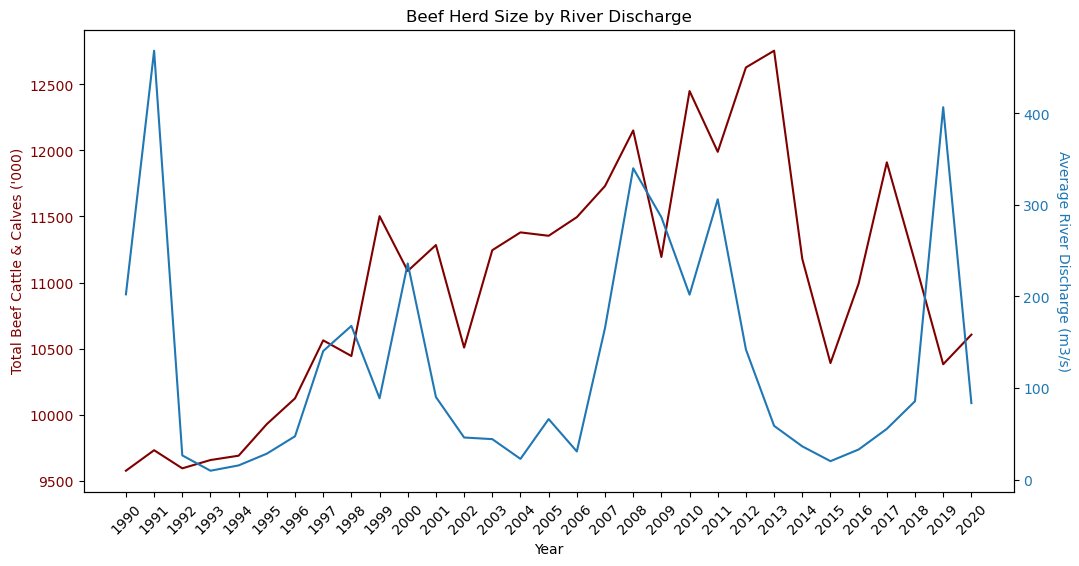

In [21]:
# Plot cattle numbers vs river discharge on the same graph
all_x_values = all_herd_vs_discharge["Year"]
all_y_values_1 = all_herd_vs_discharge["Herd Size"]
all_y_values_2 = all_herd_vs_discharge["river_discharge"]

# Set figure and xtick patameters
fig1, ax1 = plt.subplots(figsize=(12,6))
plt.xticks(np.arange(min(all_x_values), max(all_x_values)+1, 1.0), rotation=45)

# Set x-axis and first y-axis
ax1.set_xlabel("Year")
ax1.set_ylabel("Total Beef Cattle & Calves ('000)", color="maroon")
ax1.plot(all_x_values, all_y_values_1, color="maroon")
ax1.tick_params(axis="y", labelcolor="maroon")

# Set x-axis to be shared by both y-axes
ax2 = ax1.twinx()

# Set second y-axis
ax2.set_ylabel("Average River Discharge (m3/s)", rotation=270, va="bottom", color="tab:blue")
ax2.plot(all_x_values, all_y_values_2, color="tab:blue")
ax2.tick_params(axis="y", labelcolor="tab:blue")

# Set plot title
plt.title("Beef Herd Size by River Discharge")

# Save plot as png
plt.savefig("Anna Outputs/BRB-TWV-RCH-AYR_flood.png")

# Set plot layout and display
fig.tight_layout()
plt.show()


In [22]:
# Using original groupby weather dataframe, choose Year and Rain values
all_qld_av_rain = all_flood_data_yearly[["Year", "precipitation_sum"]]
all_qld_av_rain

,Year,precipitation_sum
0,1990,3.340959
1,1991,2.246575
2,1992,1.644604
3,1993,1.141301
4,1994,1.168493
5,1995,1.715068
6,1996,2.202049
7,1997,2.050753
8,1998,2.622192
9,1999,2.484795


In [23]:
# Check data types
all_qld_av_rain.dtypes

Year                  object
precipitation_sum    float64
dtype: object

In [24]:
# Convert Year values to integer
all_qld_av_rain=all_qld_av_rain.apply(pd.to_numeric, errors="coerce")

In [25]:
# Merge the average rain and cattle numbers dataframes,
# based on Year values in average rain dataframe
all_herd_vs_rain = pd.merge(all_qld_av_rain, qld_cattle_final, on="Year", how="left" )
all_herd_vs_rain

,Year,precipitation_sum,Queensland
0,1990,3.340959,9575.20
1,1991,2.246575,9730.40
2,1992,1.644604,9593.20
3,1993,1.141301,9656.10
4,1994,1.168493,9689.10
5,1995,1.715068,9928.30
6,1996,2.202049,10123.00
7,1997,2.050753,10562.30
8,1998,2.622192,10443.60
9,1999,2.484795,11502.60


In [26]:
# Drop null values
all_herd_vs_rain.dropna(how="any", inplace=True)
all_herd_vs_rain

,Year,precipitation_sum,Queensland
0,1990,3.340959,9575.20
1,1991,2.246575,9730.40
2,1992,1.644604,9593.20
3,1993,1.141301,9656.10
4,1994,1.168493,9689.10
5,1995,1.715068,9928.30
6,1996,2.202049,10123.00
7,1997,2.050753,10562.30
8,1998,2.622192,10443.60
9,1999,2.484795,11502.60


In [27]:
# Rename column
all_herd_vs_rain.rename(columns={"Queensland": "Herd Size"}, inplace=True)
all_herd_vs_rain.head()

,Year,precipitation_sum,Herd Size
0,1990,3.340959,9575.2
1,1991,2.246575,9730.4
2,1992,1.644604,9593.2
3,1993,1.141301,9656.1
4,1994,1.168493,9689.1


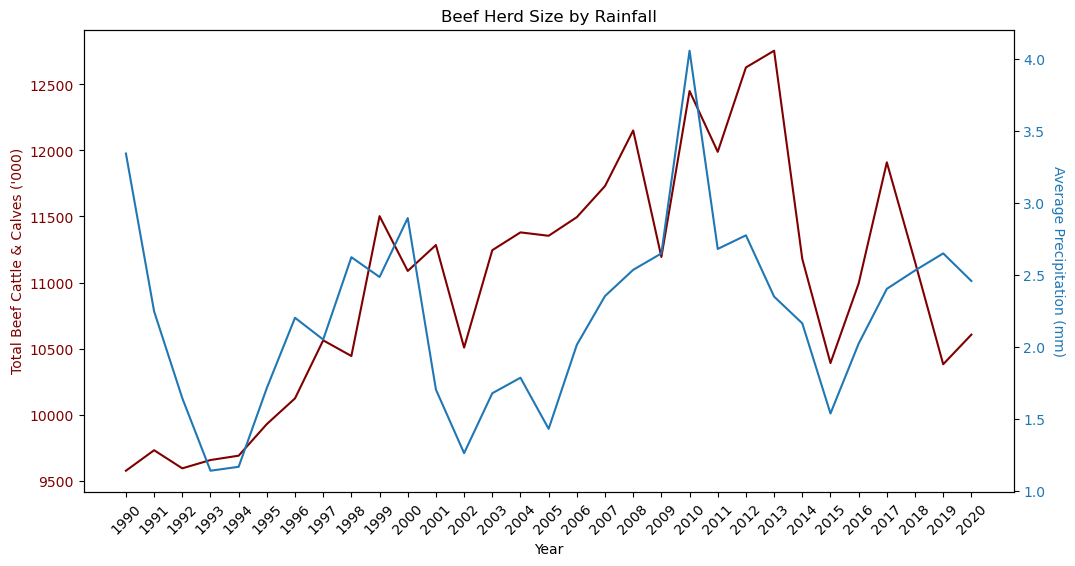

In [28]:
# Plot cattle numbers vs average rain on the same chart
rain_x_values = all_herd_vs_rain["Year"]
rain_y_values_1 = all_herd_vs_rain["Herd Size"]
rain_y_values_2 = all_herd_vs_rain["precipitation_sum"]


# Set figure and xtick patameters
fig1, ax1 = plt.subplots(figsize=(12,6))
plt.xticks(np.arange(min(rain_x_values), max(rain_x_values)+1, 1.0), rotation=45)

# Set x-axis and first y-axis
ax1.set_xlabel("Year")
ax1.set_ylabel("Total Beef Cattle & Calves ('000)", color="maroon")
ax1.plot(rain_x_values, rain_y_values_1, color="maroon")
ax1.tick_params(axis="y", labelcolor="maroon")

# Set x-axis to be shared by both y-axes
ax2 = ax1.twinx()

# Set second y-axis
ax2.set_ylabel("Average Precipitation (mm)", rotation=270, va="bottom", color="tab:blue")
ax2.plot(rain_x_values, rain_y_values_2, color="tab:blue")
ax2.tick_params(axis="y", labelcolor="tab:blue")

# Set plot title
plt.title("Beef Herd Size by Rainfall")

# Save plot as png
plt.savefig("Anna Outputs/BRB-TWV-RCH-AYR_rain.png")

# Set plot layout and display
fig.tight_layout()
plt.show()

In [29]:
# Import saleyard meat prices file
saleyard_prices = pd.read_csv("Data/abs_meat_prices_saleyard_prices_excerpt.csv")
saleyard_prices

,Unnamed: 0,Yearling,Ox b,Cow c,average d,Lamb e,Mutton g,Pig h
0,NaN,c/kg (cw),c/kg (cw),c/kg (cw),c/kg (cw),c/kg (cw),c/kg (cw),c/kg (cw)
1,1991.0,227,220,175,203,121,11.2,214
2,1992.0,224,228,172,202,131,28.9,196
3,1993.0,238,254,182,219,185,34.3,213
4,1994.0,255,246,184,221,146,34.1,202
5,1995.0,235,218,166,200,192,68.4,213
6,1996.0,181,164,128,154,234,67.7,247
7,1997.0,188,188,134,163,199,75.2,219
8,1998.0,204,206,157,180,178,79,180
9,1999.0,227,217,183,203,204,60.9,216


In [30]:
# Check data types
saleyard_prices.dtypes

Unnamed: 0    float64
Yearling       object
Ox b           object
Cow c          object
average d      object
Lamb e         object
Mutton g       object
Pig h          object
dtype: object

In [31]:
# Drop the first row
saleyard_prices.drop(saleyard_prices.index[0:2],inplace=True)
saleyard_prices.reset_index()
saleyard_prices

,Unnamed: 0,Yearling,Ox b,Cow c,average d,Lamb e,Mutton g,Pig h
2,1992.0,224,228,172,202,131,28.9,196
3,1993.0,238,254,182,219,185,34.3,213
4,1994.0,255,246,184,221,146,34.1,202
5,1995.0,235,218,166,200,192,68.4,213
6,1996.0,181,164,128,154,234,67.7,247
7,1997.0,188,188,134,163,199,75.2,219
8,1998.0,204,206,157,180,178,79,180
9,1999.0,227,217,183,203,204,60.9,216
10,2000.0,261,246,219,237,170,71.8,249
11,2001.0,330,318,289,307,262,146,276


In [32]:
# Check column names
saleyard_prices.columns.to_list()

['Unnamed: 0',
 'Yearling',
 'Ox b',
 'Cow c',
 'average d',
 'Lamb e',
 'Mutton g',
 'Pig h']

In [33]:
# Convert all non-numeric values to numeric
saleyard_prices=saleyard_prices.apply(pd.to_numeric, errors="coerce")

In [34]:
saleyard_prices.dtypes

Unnamed: 0    float64
Yearling        int64
Ox b            int64
Cow c           int64
average d       int64
Lamb e          int64
Mutton g      float64
Pig h           int64
dtype: object

In [35]:
# Convert column with Year values to integer
saleyard_prices["Unnamed: 0"] = saleyard_prices["Unnamed: 0"].astype(int)

In [36]:
# Check data types now
saleyard_prices.dtypes

Unnamed: 0      int32
Yearling        int64
Ox b            int64
Cow c           int64
average d       int64
Lamb e          int64
Mutton g      float64
Pig h           int64
dtype: object

In [37]:
# Check dataframe still looks right
saleyard_prices.head()

,Unnamed: 0,Yearling,Ox b,Cow c,average d,Lamb e,Mutton g,Pig h
2,1992,224,228,172,202,131,28.9,196
3,1993,238,254,182,219,185,34.3,213
4,1994,255,246,184,221,146,34.1,202
5,1995,235,218,166,200,192,68.4,213
6,1996,181,164,128,154,234,67.7,247


In [38]:
# Rename Year column
saleyard_prices = saleyard_prices.rename(columns={"Unnamed: 0": "Year"})
saleyard_prices.head()

,Year,Yearling,Ox b,Cow c,average d,Lamb e,Mutton g,Pig h
2,1992,224,228,172,202,131,28.9,196
3,1993,238,254,182,219,185,34.3,213
4,1994,255,246,184,221,146,34.1,202
5,1995,235,218,166,200,192,68.4,213
6,1996,181,164,128,154,234,67.7,247


In [39]:
# Keep only year and yearling prices columns
beef_prices = saleyard_prices[["Year", "Yearling"]]
beef_prices

,Year,Yearling
2,1992,224
3,1993,238
4,1994,255
5,1995,235
6,1996,181
7,1997,188
8,1998,204
9,1999,227
10,2000,261
11,2001,330


In [40]:
# Merge the yearling prices and cattle numbers dataframes,
# based on the year values in the yearling prices dataframe
herd_vs_price = pd.merge(beef_prices, qld_cattle_final, on="Year", how="left")
herd_vs_price

,Year,Yearling,Queensland
0,1992,224,9593.20
1,1993,238,9656.10
2,1994,255,9689.10
3,1995,235,9928.30
4,1996,181,10123.00
5,1997,188,10562.30
6,1998,204,10443.60
7,1999,227,11502.60
8,2000,261,11087.60
9,2001,330,11283.80


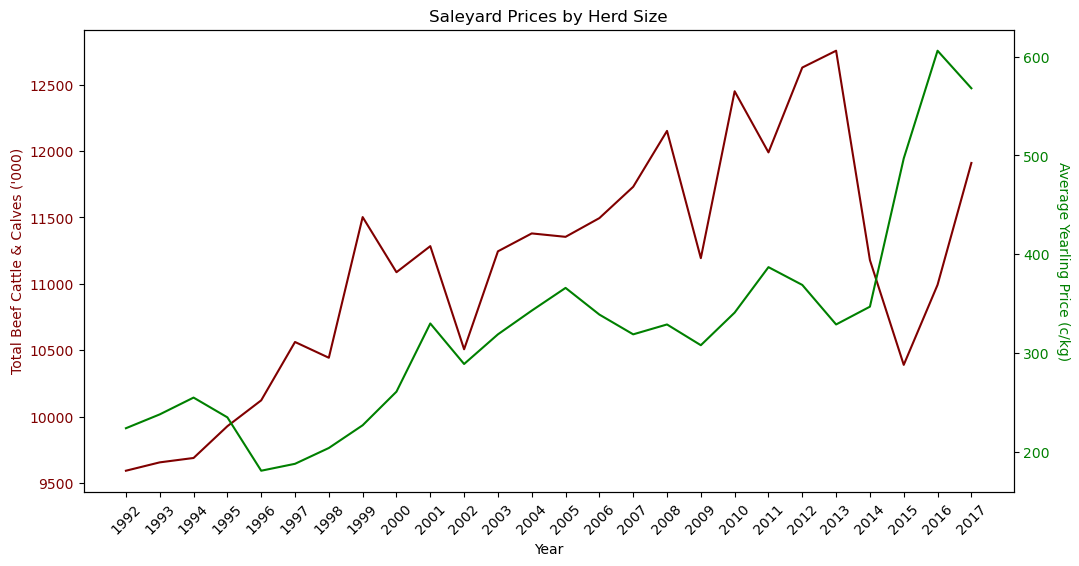

In [41]:
# Plot cattle numbers vs average rain on the same chart
price_x_values = herd_vs_price["Year"]
price_y_values_1 = herd_vs_price["Queensland"]
price_y_values_2 = herd_vs_price["Yearling"]

# Set figure and xtick patameters
fig1, ax1 = plt.subplots(figsize=(12,6))
plt.xticks(np.arange(min(price_x_values), max(price_x_values)+1, 1.0), rotation=45)

# Set x-axis and first y-axis
ax1.set_xlabel("Year")
ax1.set_ylabel("Total Beef Cattle & Calves ('000)", color="maroon")
ax1.plot(price_x_values, price_y_values_1, color="maroon")
ax1.tick_params(axis="y", labelcolor="maroon")

# Set x-axis to be shared by both y-axes
ax2 = ax1.twinx()

# Set second y-axis
ax2.set_ylabel("Average Yearling Price (c/kg)", rotation=270, va="bottom", color="green")
ax2.plot(price_x_values, price_y_values_2, color="green")
ax2.tick_params(axis="y", labelcolor="green")

# Set plot title
plt.title("Saleyard Prices by Herd Size")

# Save plot as png
plt.savefig("Anna Outputs/prices_by_herd.png")

# Set plot layout and display
fig.tight_layout()
plt.show()

In [42]:
# Merge the yearling prices and river discharge dataframes,
# based on teh year values in the yearling prices dataframe
prices_vs_flood = pd.merge(beef_prices, all_qld_av_discharge, on="Year", how="left")
prices_vs_flood

,Year,Yearling,river_discharge
0,1992,224,26.387671
1,1993,238,9.648863
2,1994,255,15.456911
3,1995,235,28.288390
4,1996,181,47.271796
5,1997,188,140.364521
6,1998,204,167.845918
7,1999,227,88.784760
8,2000,261,236.077275
9,2001,330,90.145671


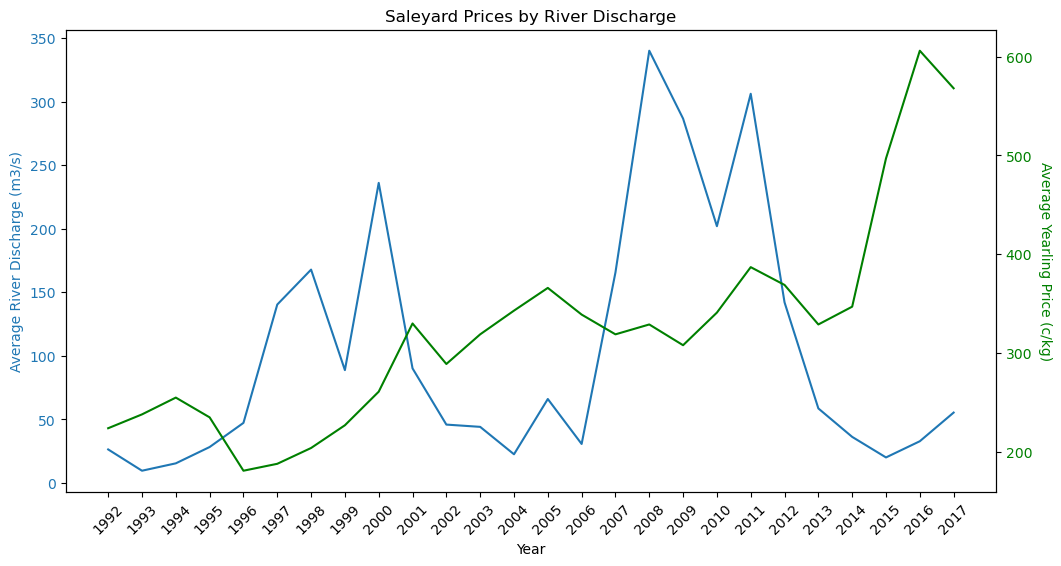

In [43]:
# Plot cattle numbers vs average rain on the same chart
price_flood_x_values = prices_vs_flood["Year"]
price_flood_y_values_1 = prices_vs_flood["river_discharge"]
price_flood_y_values_2 = prices_vs_flood["Yearling"]

# Set figure and xtick patameters
fig1, ax1 = plt.subplots(figsize=(12,6))
plt.xticks(np.arange(min(price_flood_x_values), max(price_flood_x_values)+1, 1.0), rotation=45)

# Set x-axis and first y-axis
ax1.set_xlabel("Year")
ax1.set_ylabel("Average River Discharge (m3/s)", color="tab:blue")
ax1.plot(price_flood_x_values, price_flood_y_values_1, color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")

# Set x-axis to be shared by both y-axes
ax2 = ax1.twinx()

# Set second y-axis
ax2.set_ylabel("Average Yearling Price (c/kg)", rotation=270, va="bottom", color="green")
ax2.plot(price_flood_x_values, price_flood_y_values_2, color="green")
ax2.tick_params(axis="y", labelcolor="green")

# Set plot title
plt.title("Saleyard Prices by River Discharge")

# Save plot as png
plt.savefig("Anna Outputs/prices_by_flood.png")

# Set plot layout and display
fig.tight_layout()
plt.show()